# 🌈 Visualizations

In [2]:
from chromatic import *

There are a few standard ways of visualizing rainbows. We'll demonstrate them by generating a simulated rainbow, with a cute wavelength-dependent transit signal injected into it.

In [19]:
s = SimulatedRainbow(dw=0.1 * u.micron, dt=4 * u.minute)

# inject an interesting transit signal
theta = np.linspace(0, 2 * np.pi, s.nwave)
planet_radius = np.sin(theta) * 0.05 + 0.2
r = s.inject_transit(planet_radius=planet_radius).inject_noise()

## 🌈.imshow()

Display the flux as an image, with each pixel representing the flux for a particular time and wavelength.

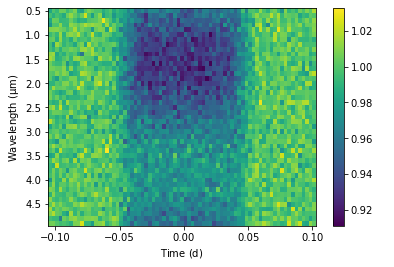

In [20]:
r.imshow();

There are a few options you might want to change.

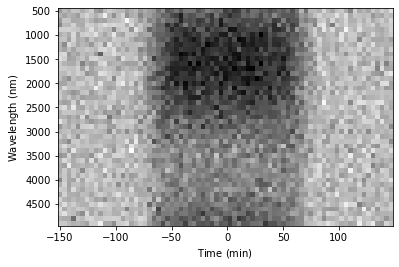

In [21]:
r.imshow(cmap="gray", colorbar=False, w_unit="nm", t_unit="minute");

Or, you might want to plot a different quantity instead.

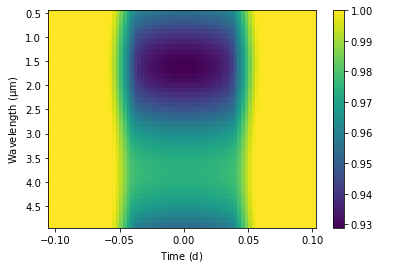

In [22]:
r.imshow(quantity="model");

And there's also a helper function to visualize all the `imshow`-able quantities.

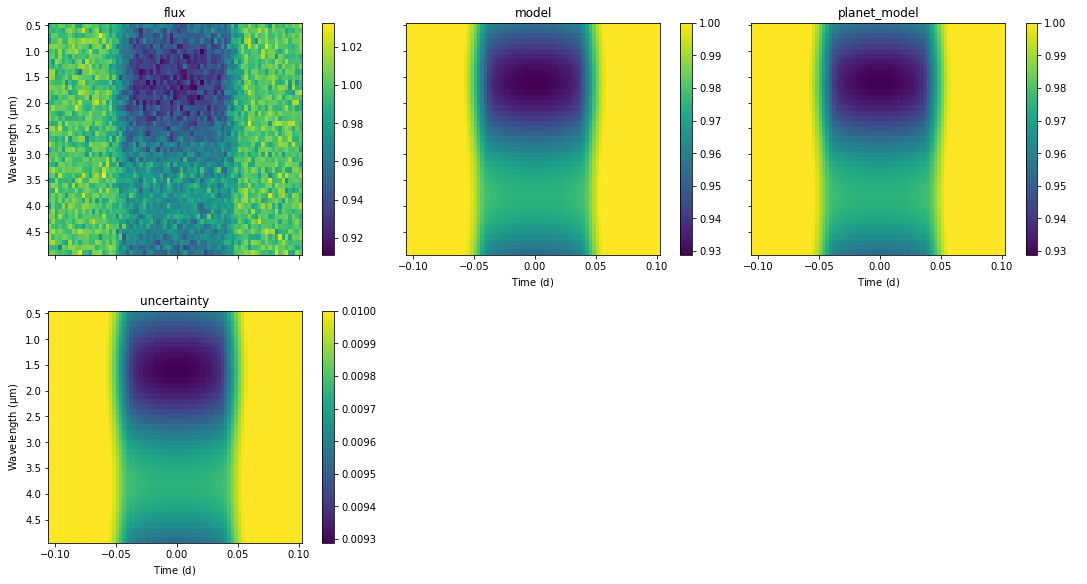

In [23]:
r.imshow_quantities()

## 🌈.pcolormesh()

Display the flux as an image, with each pixel representing the flux for a particular time and wavelength, but using `plt.pcolormesh` which allows pixels to stretch and squeeze based on the actual locations of their edges. Use `.imshow()` if you want wavelength/time bins to appear with the uniform sizes; use `.pcolormesh()` if you want to allow them to transform with the axes or non-uniform edges.

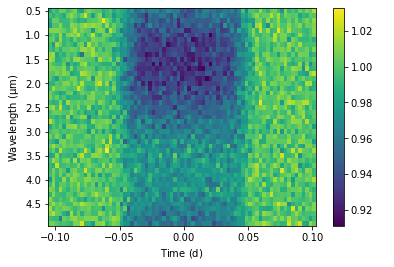

In [24]:
r.pcolormesh();

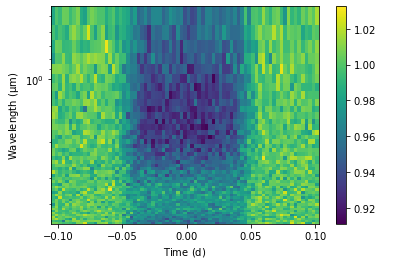

In [25]:
r.pcolormesh()
plt.yscale("log")

It accepts most of the same options as `.imshow()`.

## 🌈.plot()

Display the flux by plotting a sequence of light curves for different wavelengths, with each curve representing the flux for a particular wavelength. 

In [ ]:
r.plot();

Eep! Since it plots an individual light curve for each wavelength, plotting lots of wavelengths at once will cause things to overlap and blend together. You might want to bin your rainbow before plotting it.

In [ ]:
r.bin(R=3).plot();

There are a few options you might want to change.

In [ ]:
r.bin(R=3).plot(
    cmap="copper",
    w_unit="nm",
    t_unit="minute",
    plotkw=dict(marker="s", markersize=2, linewidth=0),
    textkw=dict(color="black", fontweight="bold"),
)

This visualization returns an `ax` object, which is the Axes where the plot was generated. You can feed that `ax` into another plot command to overplot on top.

In [ ]:
ax = r.bin(R=3).plot(plotkw=dict(alpha=0.2, markeredgecolor="none", linewidth=0))
r.bin(R=3, dt=15 * u.minute).plot(ax=ax)

## 🌈.animate_lightcurves()

Display the flux by animating a sequence of light curve plots, flipping through different wavelengths.

In [ ]:
r.animate_lightcurves();

<img src='animated-lightcurves.gif' align='left'>

## 🌈.animate_spectra()

Display the flux by animating a sequence of spectrum plots, flipping through different times.

In [ ]:
r.animate_spectra();

<img src='animated-spectra.gif' align='left'>

## 🌈.imshow_interact()

*This feature requires [Altair](https://altair-viz.github.io/getting_started/installation.html). It should already be installed as a dependency for `chromatic-lightcurves`, but you might need to install it yourself.*

Similar to `.imshow()` but you can click and drag on the `imshow` panel on the left to select a wavelength range for generating a wavelength-averaged lightcurve. 

In [ ]:
r.imshow_interact()

Like `imshow()`, there are options you might like to change (see [Vega documentation](https://vega.github.io/vega/docs/schemes/) for color schemes):

In [ ]:
r.imshow_interact(cmap="magma", t_unit="h", w_unit="nm", custom_ylims=[0.97, 1.01])

We can also plot the `uncertainty` (or any other fluxlike quantity). In this simulated case, it is time and wavelength-independent so not very interesting.

In [ ]:
r.imshow_interact(quantity="uncertainty")